[Logo](https://www.kitepackaging.co.uk/)
<p style="background-color:#808080;"><span style="color:#ffffff;"><i> 
<img src="https://www.kitepackaging.co.uk/images/kite-logo-2021.png" alt="Logo" width="100" height="200">

>>>>#                            **KITE PACKAGING : SENTIMENT ANALYSIS**

#

<div style="text-align: center;">
    <img src="https://media.kitepackaging.co.uk/images/content/kite-fleet-6df6ac59-afec-490a-b826-5ccf19a1d715..png?width=2400&optimize=medium" alt="Logo" width="800" height="700">
</div>
'''


[Logo](https://www.kitepackaging.co.uk/)
<p style="background-color:#808080;"><span style="color:#ffffff;"><i> 
<img src="https://www.kitepackaging.co.uk/images/kite-logo-2021.png" alt="Logo" width="100" height="200">

># **1. Web Scrapping : 300 reviews Trustpilot**

In [6]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# List of URLs to scrape
urls = [
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=2',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=3',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=4',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=5',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=6',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=7',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=8',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=9',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=10',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=11',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=12',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=13',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=14',
    'https://www.trustpilot.com/review/www.kitepackaging.co.uk?page=15'
]

# Empty list to store all reviews across multiple pages
all_reviews_data = []

# Loop through each URL
for url in urls:
    # Make a request to the URL
    response = requests.get(url)
    
    # Parse the page content
    soup = BeautifulSoup(response.content, 'html.parser')
    
    # Find all the tags with header reviews
    all_headers = soup.find_all('h2', class_="typography_heading-s__f7029 typography_appearance-default__AAY17")
    
    # Find all the tags with review texts
    all_reviews = soup.find_all('p', class_="typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn")
    
    # Match reviews and headers based on the minimum number found
    min_count = min(len(all_headers), len(all_reviews))
    
    for i in range(min_count):
        header_text = all_headers[i].text if i < len(all_headers) else 'No header'
        review_text = all_reviews[i].text if i < len(all_reviews) else 'No review'
        all_reviews_data.append({
            'Header': header_text,
            'Review Text': review_text
        })
    
    # Handle cases where there are more headers than reviews, or vice versa
    if len(all_headers) > min_count:
        for i in range(min_count, len(all_headers)):
            all_reviews_data.append({
                'Header': all_headers[i].text,
                'Review Text': '...'
            })
    elif len(all_reviews) > min_count:
        for i in range(min_count, len(all_reviews)):
            all_reviews_data.append({
                'Header': 'No header',
                'Review Text': all_reviews[i].text
            })
# Print response.
print(response)

# Create a DataFrame from the collected reviews across all URLs
trustpilot = pd.DataFrame(all_reviews_data)

# Display the DataFrame
trustpilot.head()

<Response [200]>


,Header,Review Text
0,Great service,Great service Quick delivery Would love a few ...
1,Nearly perfect however,To order from your company was so easy.The qua...
2,The Best‼️,Without me even selecting they added next day ...
3,Very helpful staff,"Very helpful staff, great product but their de..."
4,Easy to place an order,"Easy to place an order, prices looked keen, or..."


In [7]:
# Save df to CSV.
trustpilot.to_csv("reviews_trustpilot.csv", index=False)

#

[Logo](https://www.kitepackaging.co.uk/)
<p style="background-color:#808080;"><span style="color:#ffffff;"><i> 
<img src="https://www.kitepackaging.co.uk/images/kite-logo-2021.png" alt="Turtle Logo" width="100" height="200">

># **2. Sentiment Analysis**

## **Load data and explore data**

In [12]:
# Import all the necessary packages.
import pandas as pd
import numpy as np
import seaborn as sns
import nltk 
import os 
import matplotlib.pyplot as plt

# nltk.download ('punkt').
# nltk.download ('stopwords').

from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
from scipy.stats import norm
from collections import Counter
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Import Counter.
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [13]:
# Upload CSV file.
reviews_raw = pd.read_csv('reviews_trustpilot.csv')

# View DataFrame.
reviews_raw.head()

,Header,Review Text
0,Great service,Great service Quick delivery Would love a few ...
1,Nearly perfect however,To order from your company was so easy.The qua...
2,The Best‼️,Without me even selecting they added next day ...
3,Very helpful staff,"Very helpful staff, great product but their de..."
4,Easy to place an order,"Easy to place an order, prices looked keen, or..."


In [14]:
# Explore data set.
reviews_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Header       300 non-null    object
 1   Review Text  300 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [15]:
# Look for missing values.
reviews_raw.isnull().sum()

Header         0
Review Text    0
dtype: int64

In [16]:
# Rename columns
reviews_raw.rename(columns={"Header": "heading", "Review Text": "review"}, inplace=True)

# Display new names DataFrame.
reviews_raw.head()

,heading,review
0,Great service,Great service Quick delivery Would love a few ...
1,Nearly perfect however,To order from your company was so easy.The qua...
2,The Best‼️,Without me even selecting they added next day ...
3,Very helpful staff,"Very helpful staff, great product but their de..."
4,Easy to place an order,"Easy to place an order, prices looked keen, or..."


#

## **Prepare data for NLP**

In [19]:
# Copy DataFrame.
reviews = reviews_raw.copy()

# Change all columns to lower case and join with a space.
reviews['heading'] = reviews['heading'].apply(lambda x: " ".join(x.lower() for x in x.split()))
reviews['review'] = reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))

# Preview the result.
reviews.head()

,heading,review
0,great service,great service quick delivery would love a few ...
1,nearly perfect however,to order from your company was so easy.the qua...
2,the best‼️,without me even selecting they added next day ...
3,very helpful staff,"very helpful staff, great product but their de..."
4,easy to place an order,"easy to place an order, prices looked keen, or..."


In [20]:
# Copy DataFrame.
reviews_v = reviews.copy()

# Replace all the punctuations in both columns.
reviews_v['heading'] = reviews_v['heading'].str.replace('[^\w\s]', '', regex=True)
reviews_v['review'] = reviews_v['review'].str.replace('[^\w\s]', '', regex=True)

# Preview the result.
reviews_v.head()

,heading,review
0,great service,great service quick delivery would love a few ...
1,nearly perfect however,to order from your company was so easythe qual...
2,the best,without me even selecting they added next day ...
3,very helpful staff,very helpful staff great product but their del...
4,easy to place an order,easy to place an order prices looked keen orde...


#

## **Tokenise**

In [23]:
# Copy DataFrame before starting tokenisation.
reviews_v1 = reviews_v.copy()

In [24]:
# Apply tokenisation to columns.
reviews_v1['heading_tokens'] = reviews_v1['heading'].apply(word_tokenize)
reviews_v1['review_tokens'] = reviews_v1['review'].apply(word_tokenize)

# View DataFrame.
reviews_v1.head()

,heading,review,heading_tokens,review_tokens
0,great service,great service quick delivery would love a few ...,"[great, service]","[great, service, quick, delivery, would, love,..."
1,nearly perfect however,to order from your company was so easythe qual...,"[nearly, perfect, however]","[to, order, from, your, company, was, so, easy..."
2,the best,without me even selecting they added next day ...,"[the, best]","[without, me, even, selecting, they, added, ne..."
3,very helpful staff,very helpful staff great product but their del...,"[very, helpful, staff]","[very, helpful, staff, great, product, but, th..."
4,easy to place an order,easy to place an order prices looked keen orde...,"[easy, to, place, an, order]","[easy, to, place, an, order, prices, looked, k..."


#

## **Visualise the most frequent words**

In [27]:
# String all the headings together in a single variable.
# Create an empty string variable.
all_headings = ''
for i in range(reviews_v1.shape[0]):
    # Safely access the i-th row with .iloc[]
    heading_tokens = reviews_v1.iloc[i]['heading_tokens']
    
    # Convert the list of tokens into a single string and then concatenate.
    all_headings += ' '.join(heading_tokens) + ' '


# String all the reviews together in a single variable.
# Create an empty string variable.
all_reviews = ''
for i in range(reviews_v1.shape[0]):
    # Safely access the i-th row with .iloc[]
    review_tokens = reviews_v1.iloc[i]['review_tokens']
    
    # Convert the list of tokens into a single string and then concatenate.
    all_reviews += ' '.join(review_tokens) + ' '

In [28]:
# Set the colour palette.
sns.set(color_codes=True)

# Create a WordCloud object to plot 'all_headings'.
wordcloud_h = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'cividis', #colour-blind friendly
                stopwords = 'none',
                min_font_size = 10).generate(all_headings) 

# Create a WordCloud object to plot 'all_reviews'.
wordcloud_r = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'cividis', #colour-blind friendly
                stopwords = 'none',
                min_font_size = 10).generate(all_reviews) 

print(wordcloud_h)
print(wordcloud_r)

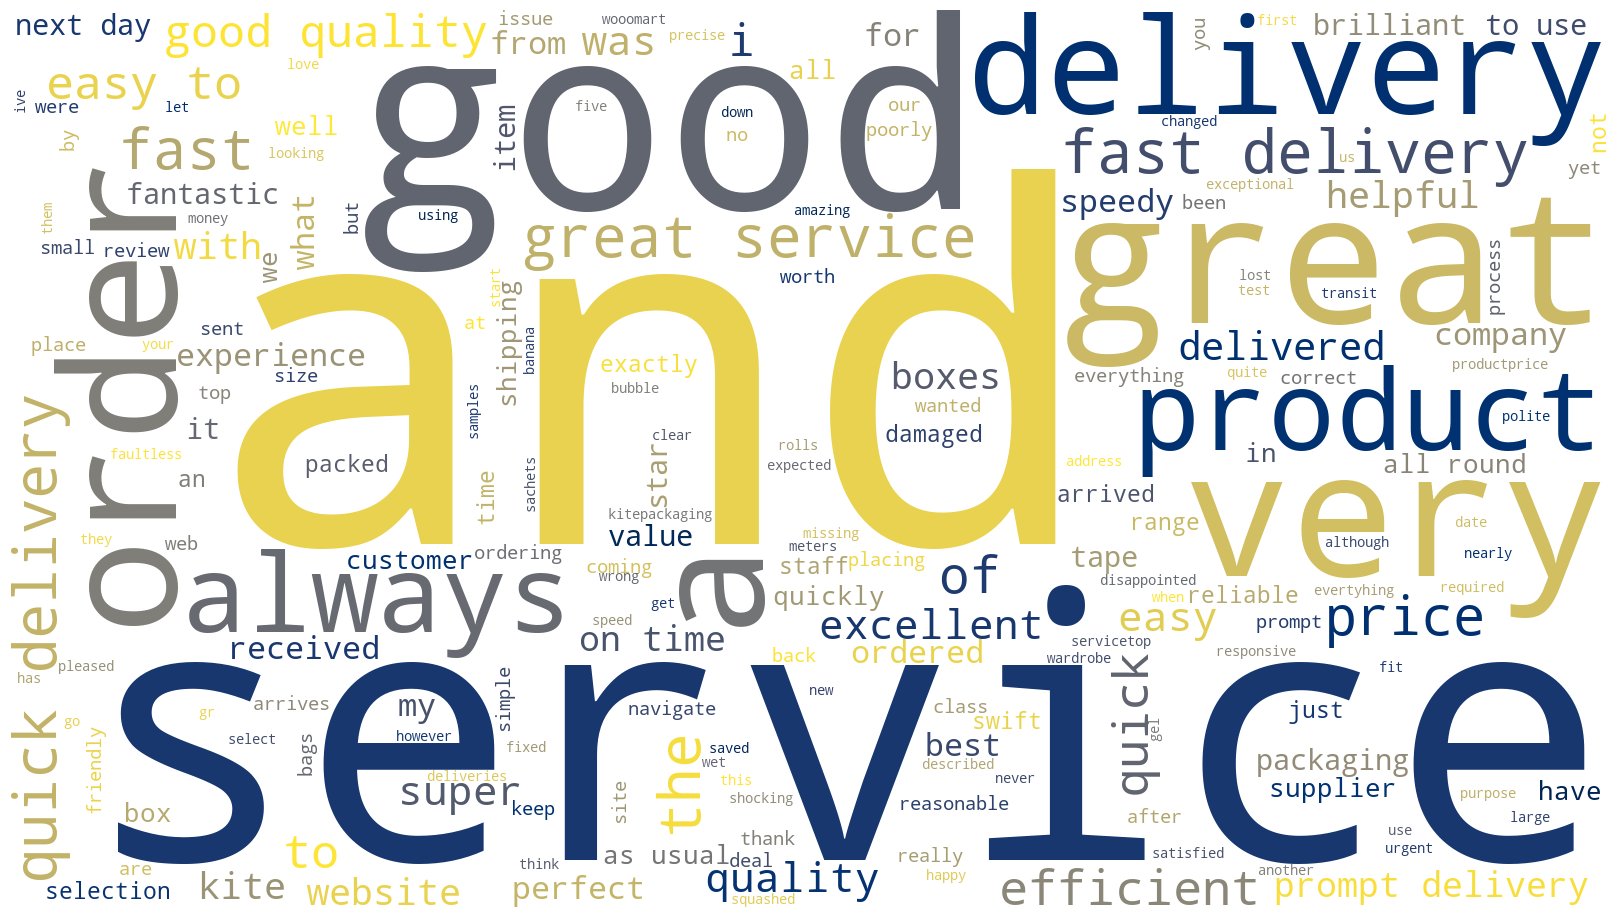

In [29]:
# Plot the WordCloud image 'all_headings'.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_h) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
# Save plot to a PNG file.
plt.savefig('headings_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

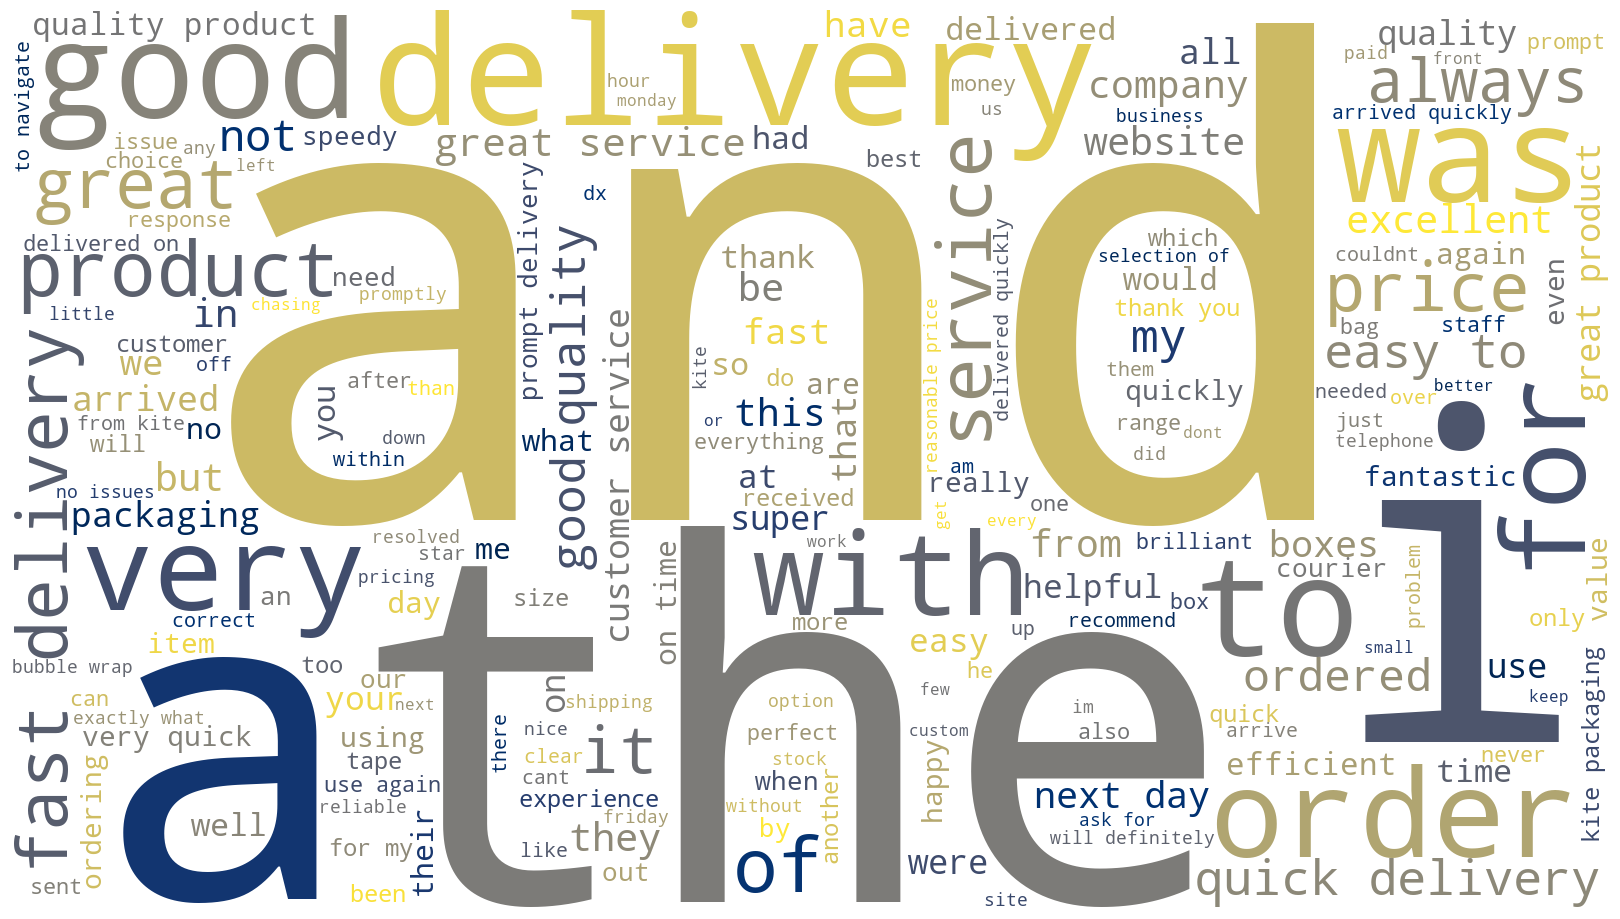

In [30]:
# Plot the WordCloud image 'all_reviews'.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
# Save plot to a PNG file.
plt.savefig('reviews_wordcloud.png', bbox_inches='tight', dpi=300)
plt.show()

#

## **Visualise the most frequent words without stopwords/alphanumeric**

> ### **Calculate frequency distribution**

In [34]:
# Create an empty list to hold all tokens found in 'headings'.
all_headings = []

# Use .iloc to iterate through DataFrame rows by position.
for i in range(reviews_v1.shape[0]):
    # Safely access the i-th row using .iloc and add each token list to all_headings.
    all_headings += reviews_v1.iloc[i]['heading_tokens']


# Create an empty list to hold all tokens found in 'reviews'.
all_reviews = []

# Use .iloc to iterate through DataFrame rows by position.
for i in range(reviews_v1.shape[0]):
    # Safely access the i-th row using .iloc and add each token list to all_summaries.
    all_reviews += reviews_v1.iloc[i]['review_tokens']

# Calculate the frequency distribution of the tokens.
fdist_headings = FreqDist(all_headings)
fdist_reviews = FreqDist(all_reviews)

In [35]:
# Preview the frequency distributions.
fdist_headings

FreqDist({'and': 83, 'delivery': 72, 'service': 57, 'great': 55, 'good': 47, 'fast': 39, 'quick': 34, 'very': 33, 'to': 31, 'order': 25, ...})

In [36]:
# Preview the frequency distributions.
fdist_reviews

FreqDist({'and': 186, 'delivery': 139, 'the': 112, 'to': 91, 'good': 71, 'service': 69, 'great': 67, 'a': 61, 'was': 58, 'i': 55, ...})

#

> ### **Remove alphanumeric characters and stopwords**

In [39]:
# Delete all the alphanumeric.
heading_nonalp = [word for word in all_headings if word.isalnum()]
review_nonalp = [word for word in all_reviews if word.isalnum()]

print(len(heading_nonalp))
print(len(review_nonalp))

1260
3881


In [40]:
# Remove all the stopwords.
# Create a set of English stopwords.
english_stopwords = set(stopwords.words('english'))

# Create a filtered list of tokens without stopwords.
heading_nonstop = [x for x in heading_nonalp if x.lower() not in english_stopwords]

# Define an empty string variable.
heading_nonstop_str = ''

for value in heading_nonalp:
    # Add each filtered token word to the string.
    heading_nonstop_str = heading_nonstop_str + value + ' '



# Create a filtered list of tokens without stopwords.
review_nonstop = [x for x in review_nonalp if x.lower() not in english_stopwords]

# Define an empty string variable.
review_nonstop_str = ''

for value in review_nonalp:
    # Add each filtered token word to the string.
    review_nonstop_str = review_nonstop_str + value + ' '

#

> ### **Create wordclouds without stopwords**

In [43]:
# Create a wordcloud without stop words.
wordcloud_h2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'viridis',
                min_font_size = 10).generate(heading_nonstop_str) 


# Create a WordCloud without stop words.
wordcloud_r2 = WordCloud(width = 1600, height = 900, 
                background_color ='white',
                colormap = 'viridis', 
                min_font_size = 10).generate(review_nonstop_str)

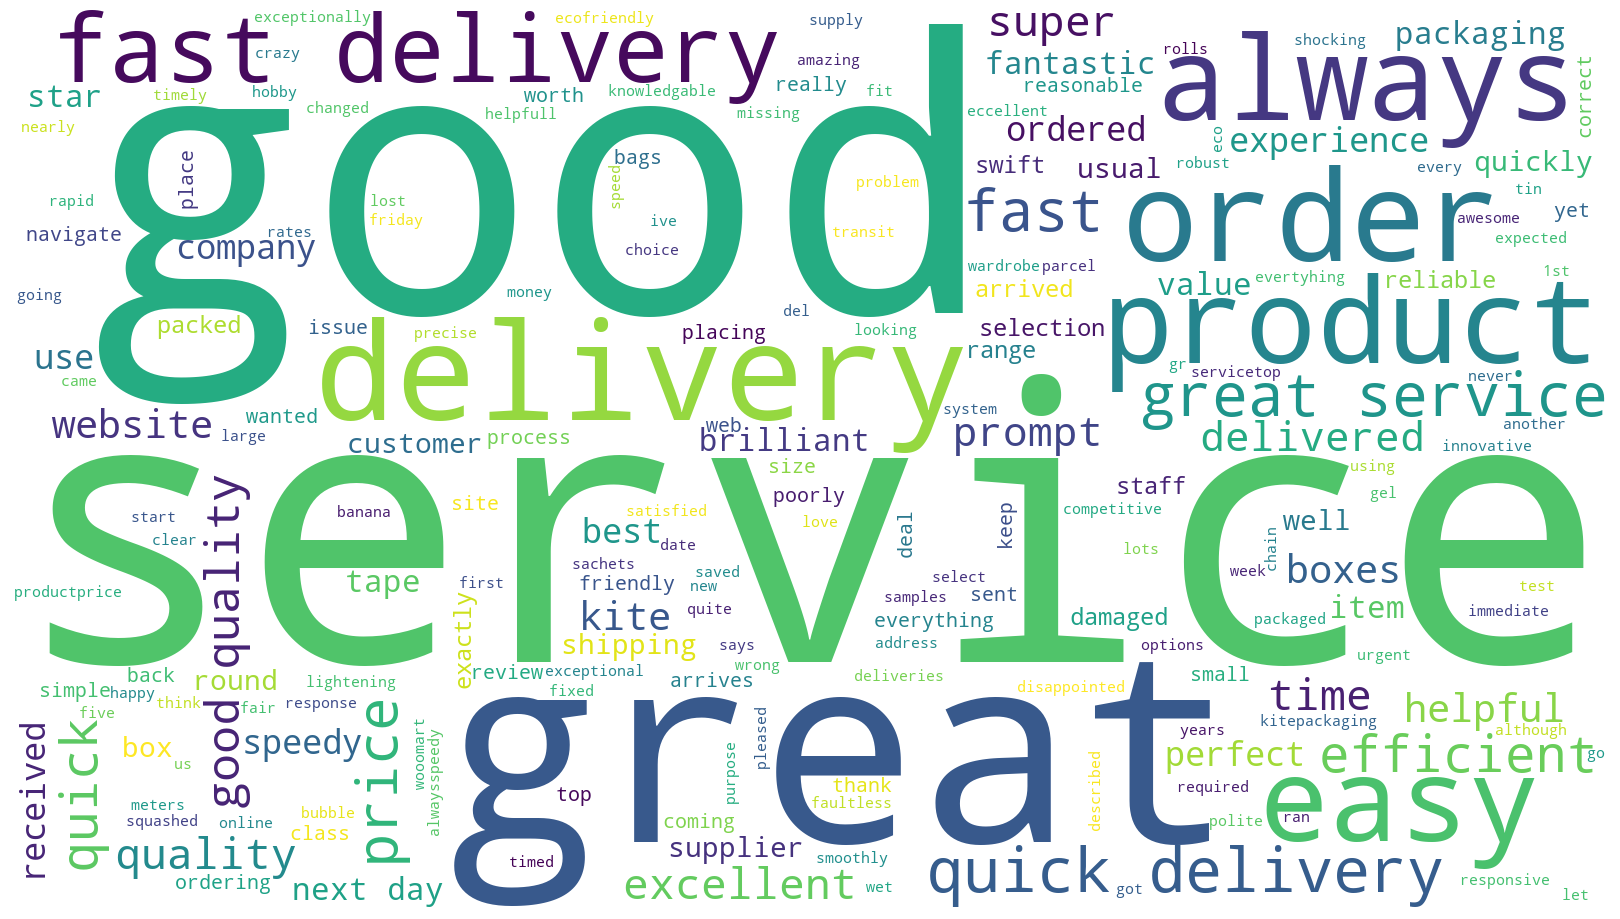

In [44]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_h2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
# Save plot to a PNG file.
plt.savefig('headings_wordcloud_final.png', bbox_inches='tight', dpi=300)
plt.show()

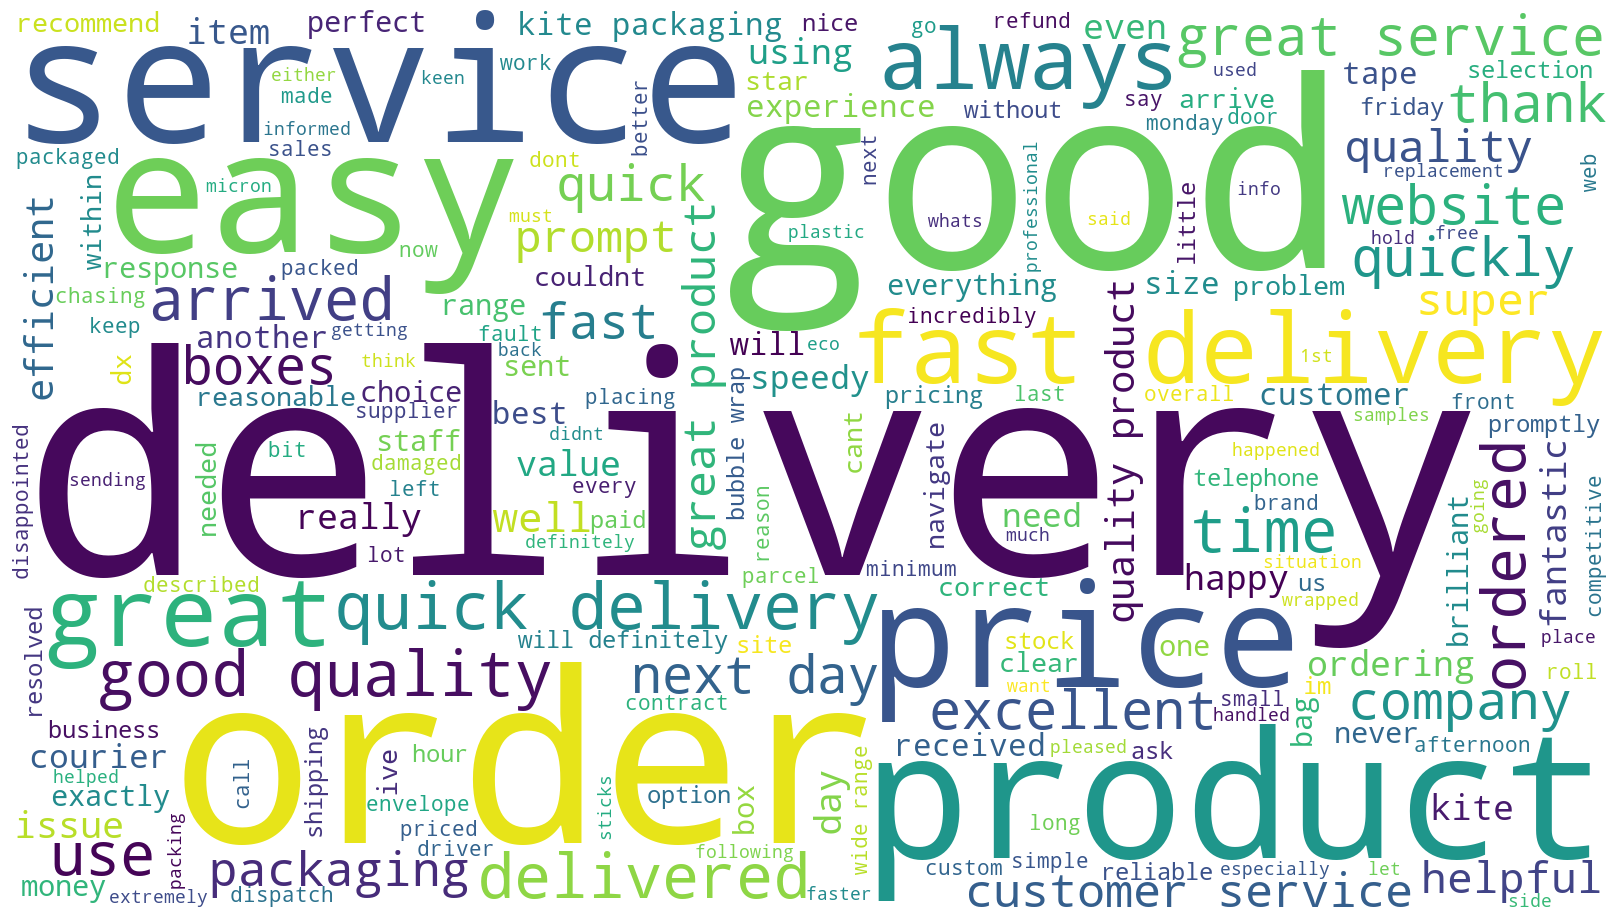

In [45]:
# Plot the WordCloud image.                    
plt.figure(figsize = (16, 9), facecolor = None) 
plt.imshow(wordcloud_r2) 
plt.axis('off') 
plt.tight_layout(pad = 0) 
# Save plot to a PNG file.
plt.savefig('reviews_wordcloud_final.png', bbox_inches='tight', dpi=300)
plt.show()

#

## **Identify and visualise 10 most common words**

> ### **Calculate frequency distribution**

In [49]:
# View the frequency distribution.
fdist_headings10 = FreqDist(heading_nonstop)

# Preview the data.
fdist_headings10

FreqDist({'delivery': 72, 'service': 57, 'great': 55, 'good': 47, 'fast': 39, 'quick': 34, 'order': 25, 'easy': 23, 'always': 23, 'quality': 22, ...})

In [50]:
# View the frequency distribution.
fdist_reviews10 = FreqDist(review_nonstop)

# Preview the data.
fdist_reviews10

FreqDist({'delivery': 139, 'good': 71, 'service': 69, 'great': 67, 'fast': 50, 'quality': 49, 'order': 45, 'quick': 41, 'easy': 38, 'products': 34, ...})

In [51]:
# Generate a DataFrame from Counter.
counts_headings = pd.DataFrame(Counter(heading_nonstop).most_common(10),
                      columns=['Word', 'Frequency']).set_index('Word')

# Generate a DataFrame from Counter.
counts_reviews = pd.DataFrame(Counter(review_nonstop).most_common(10),
                      columns=['Word', 'Frequency']).set_index('Word')

# Preview data.
print("The 10 most common words found in 'heading' are:\n",counts_headings)
print("The 10 most common words found in 'review' are:\n",counts_reviews)

The 10 most common words found in 'heading' are:
           Frequency
Word               
delivery         72
service          57
great            55
good             47
fast             39
quick            34
order            25
easy             23
always           23
quality          22
The 10 most common words found in 'review' are:
           Frequency
Word               
delivery        139
good             71
service          69
great            67
fast             50
quality          49
order            45
quick            41
easy             38
products         34


#

> ### **Plot most frequent words**

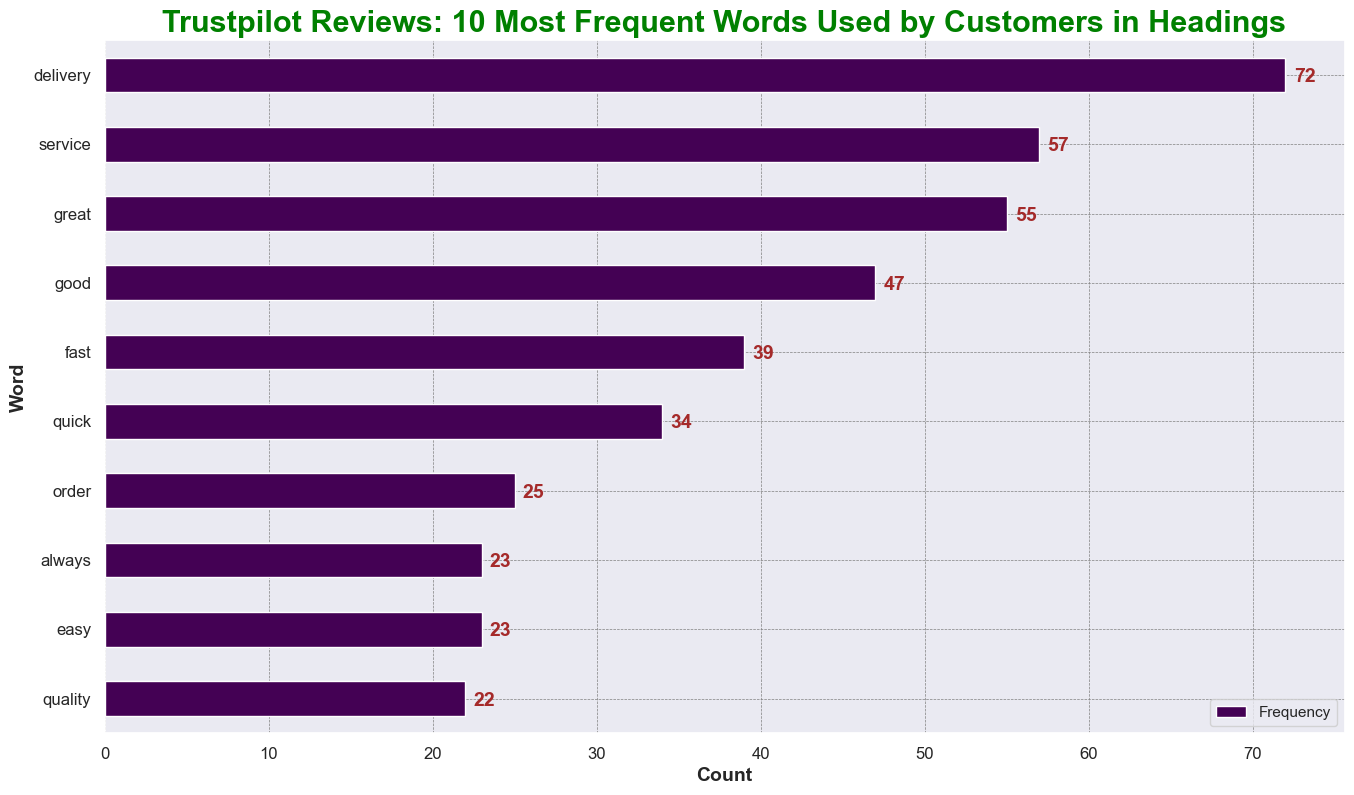

In [54]:
# Sort the counts in descending order.
counts_head_sorted = counts_headings.sort_values(by= 'Frequency')

# Set the plot type.
ax = counts_head_sorted.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='viridis')

# Set the labels with customized font size and weight.
ax.set_xlabel('Count', fontsize=14, fontweight='bold')
ax.set_ylabel('Word', fontsize=14, fontweight='bold')
ax.set_title("Trustpilot Reviews: 10 Most Frequent Words Used by Customers in Headings", 
             fontsize=22, fontweight='bold', color='green')

# Add subtle gridlines for better readability.
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Draw the bar labels with improved positioning and aesthetics.
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + 0.15, str(round(i.get_width(), 2)),
            fontsize=14, color='brown', fontweight='bold')

# Save plot to a PNG file.
plt.savefig('headings_top10.png', bbox_inches='tight', dpi=300)

# Display the plot.
plt.show()

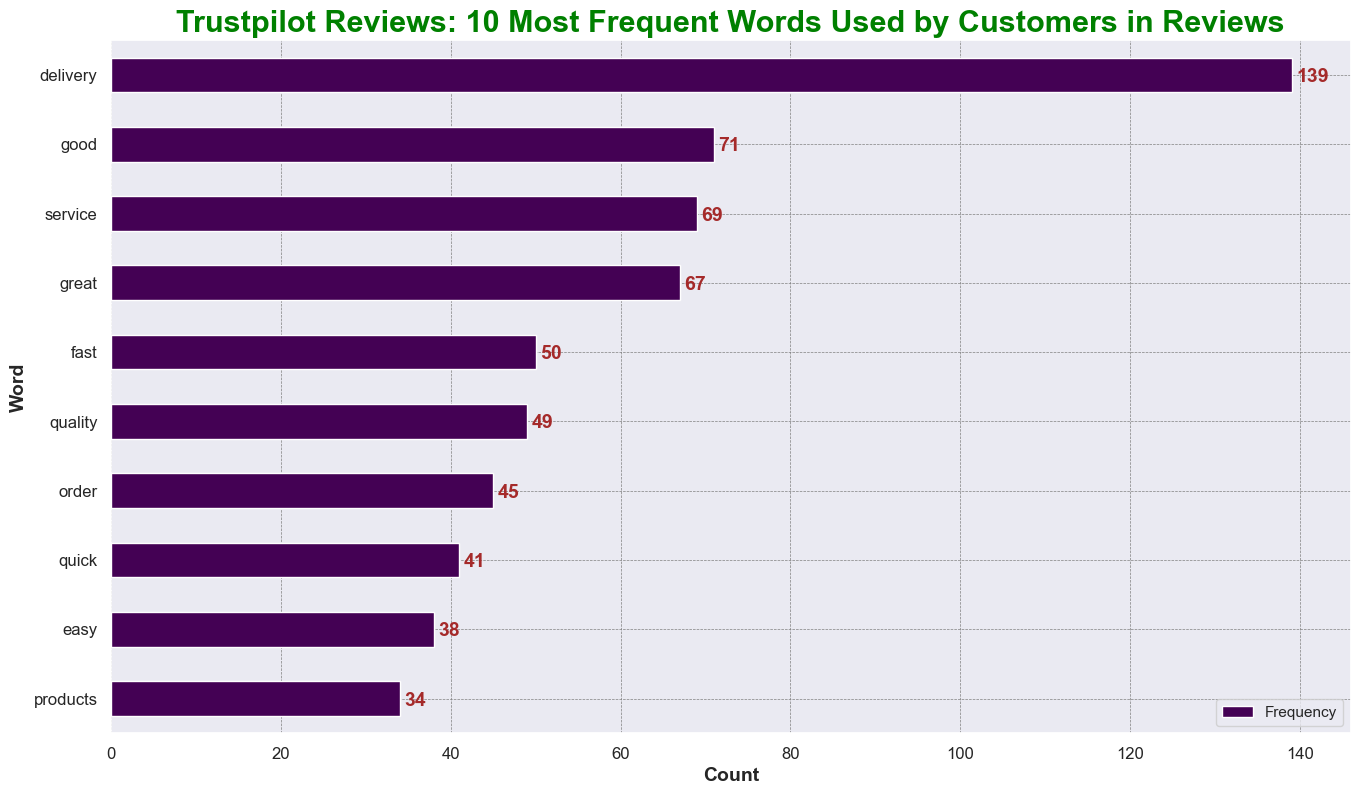

In [55]:
# Sort the counts in descending order.
counts_rev_sorted = counts_reviews.sort_values(by= 'Frequency')

# Set the plot type.
ax = counts_rev_sorted.plot(kind='barh', figsize=(16, 9), fontsize=12, colormap='viridis')

# Set the labels with customized font size and weight.
ax.set_xlabel('Count', fontsize=14, fontweight='bold')
ax.set_ylabel('Word', fontsize=14, fontweight='bold')
ax.set_title("Trustpilot Reviews: 10 Most Frequent Words Used by Customers in Reviews", 
             fontsize=22, fontweight='bold', color='green')

# Add subtle gridlines for better readability.
ax.grid(True, which='major', linestyle='--', linewidth=0.5, color='gray')

# Draw the bar labels with improved positioning and aesthetics.
for i in ax.patches:
    ax.text(i.get_width() + 0.5, i.get_y() + 0.15, str(round(i.get_width(), 2)),
            fontsize=14, color='brown', fontweight='bold')

# Save plot to a PNG file.
plt.savefig('reviews_top10.png', bbox_inches='tight', dpi=300)

# Display the plot.
plt.show()

#

## **Review sentiment polarity**

In [58]:
# View DataFrame.
reviews_v1.head()

,heading,review,heading_tokens,review_tokens
0,great service,great service quick delivery would love a few ...,"[great, service]","[great, service, quick, delivery, would, love,..."
1,nearly perfect however,to order from your company was so easythe qual...,"[nearly, perfect, however]","[to, order, from, your, company, was, so, easy..."
2,the best,without me even selecting they added next day ...,"[the, best]","[without, me, even, selecting, they, added, ne..."
3,very helpful staff,very helpful staff great product but their del...,"[very, helpful, staff]","[very, helpful, staff, great, product, but, th..."
4,easy to place an order,easy to place an order prices looked keen orde...,"[easy, to, place, an, order]","[easy, to, place, an, order, prices, looked, k..."


In [59]:
# Define a function to extract polarity scores.
def generate_polarity(comment):
    '''Extract polarity score (-1 to +1) for each comment'''
    return TextBlob(comment).sentiment[0]

In [60]:
# Determine polarity of both columns. 
reviews_v1['heading_polarity'] = reviews_v1['heading'].apply(generate_polarity)
reviews_v1['review_polarity'] = reviews_v1['review'].apply(generate_polarity)

# View output.
reviews_v1.head()

,heading,review,heading_tokens,review_tokens,heading_polarity,review_polarity
0,great service,great service quick delivery would love a few ...,"[great, service]","[great, service, quick, delivery, would, love,...",0.800000,0.324583
1,nearly perfect however,to order from your company was so easythe qual...,"[nearly, perfect, however]","[to, order, from, your, company, was, so, easy...",1.000000,0.088889
2,the best,without me even selecting they added next day ...,"[the, best]","[without, me, even, selecting, they, added, ne...",1.000000,0.250000
3,very helpful staff,very helpful staff great product but their del...,"[very, helpful, staff]","[very, helpful, staff, great, product, but, th...",0.200000,0.130556
4,easy to place an order,easy to place an order prices looked keen orde...,"[easy, to, place, an, order]","[easy, to, place, an, order, prices, looked, k...",0.433333,0.566667


#

> ### **Plot polarity**

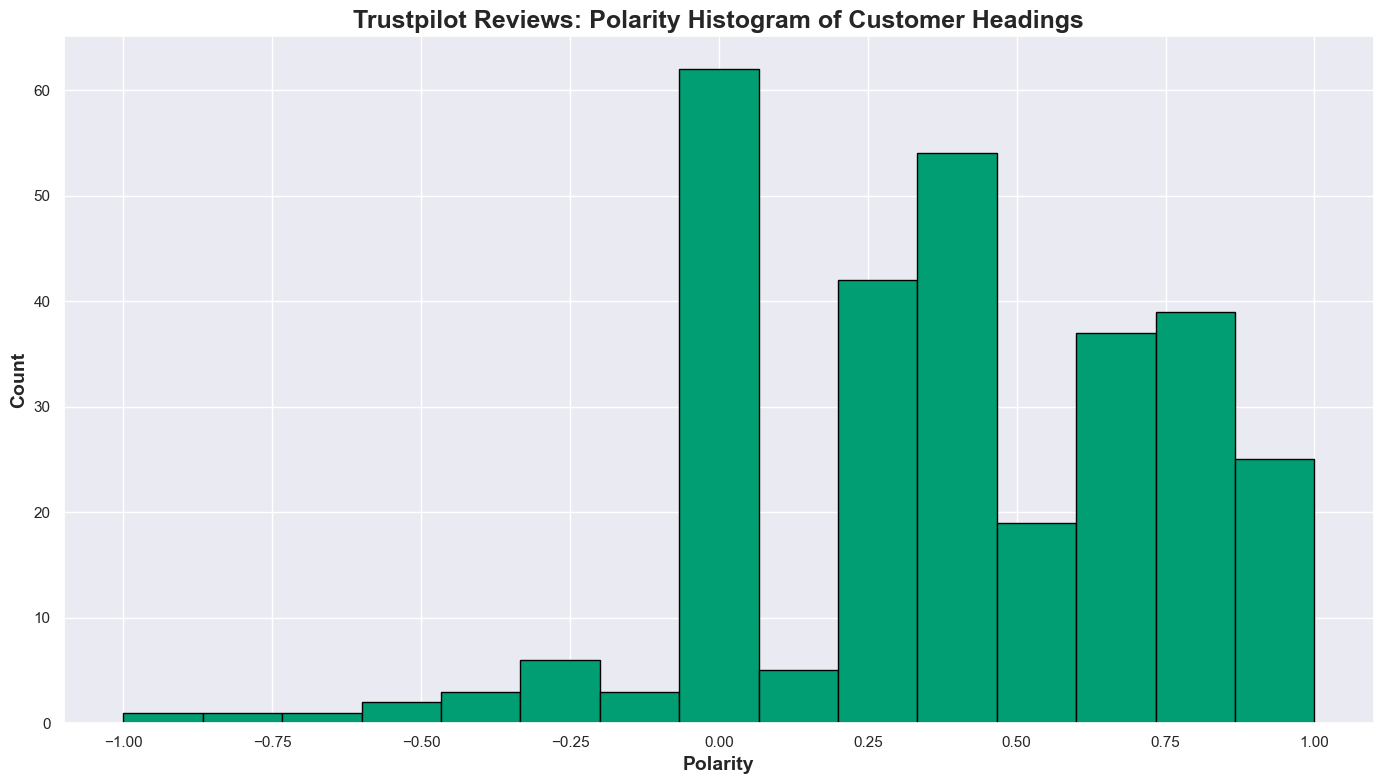

In [63]:
# Set colour palette.
color = sns.color_palette("colorblind")[2]

# Plot the histogram.
plt.figure(figsize=(14, 8))
plt.hist(reviews_v1['heading_polarity'], bins=15, color=color, edgecolor='black')
plt.xlabel('Polarity', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Trustpilot Reviews: Polarity Histogram of Customer Headings', fontsize=18, fontweight='bold')

# Adjust layout to avoid overlap.
plt.tight_layout()

# Save plot to a PNG file.
plt.savefig('polar_heading.png', bbox_inches='tight', dpi=300)

# Show the plot.
plt.show()

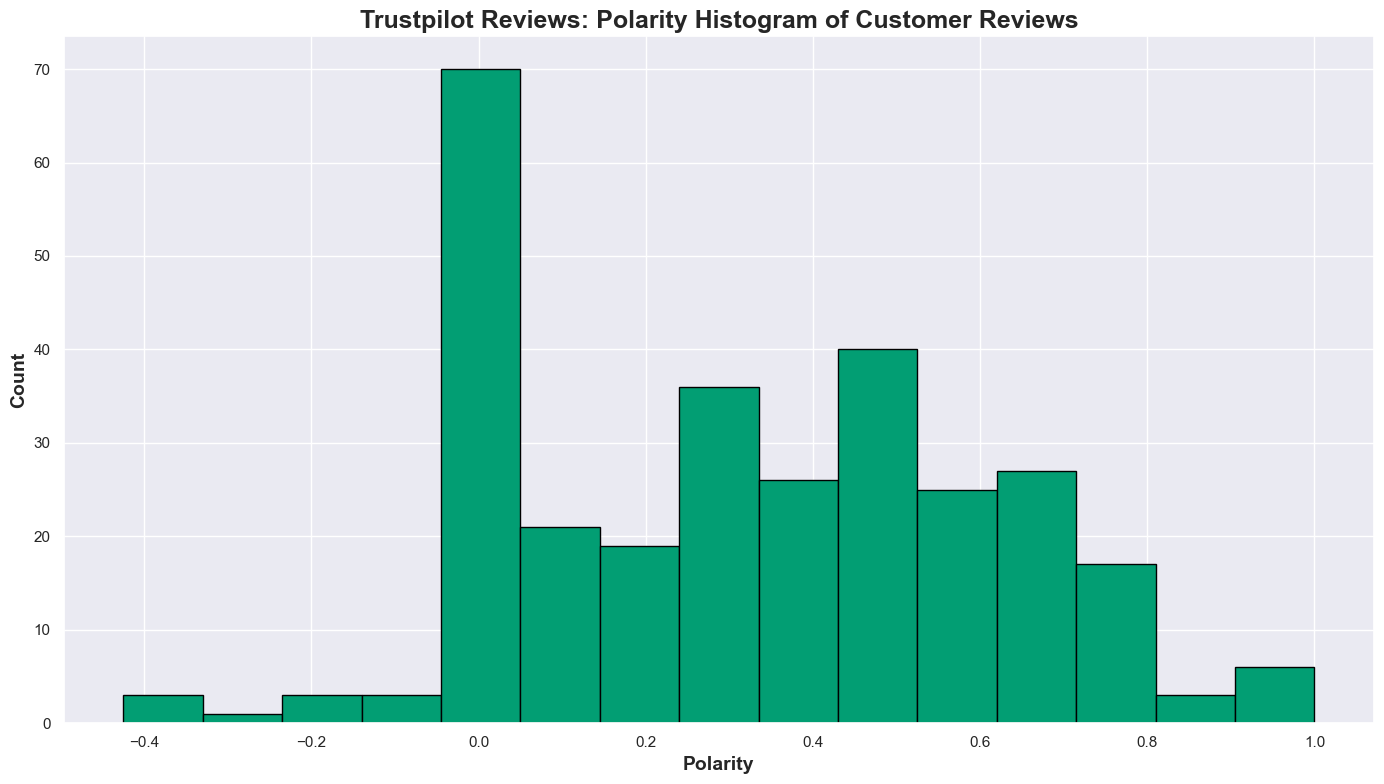

In [64]:
# Set colour palette.
color = sns.color_palette("colorblind")[2]

# Plot the histogram.
plt.figure(figsize=(14, 8))
plt.hist(reviews_v1['review_polarity'], bins=15, color=color, edgecolor='black')
plt.xlabel('Polarity', fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Trustpilot Reviews: Polarity Histogram of Customer Reviews', fontsize=18, fontweight='bold')

# Adjust layout to avoid overlap.
plt.tight_layout()

# Save plot to a PNG file.
plt.savefig('polar_review.png', bbox_inches='tight', dpi=300)

# Show the plot.
plt.show()

#

## **Review sentiment scores**

> ### **Sentiment analysis headings**

In [68]:
# Create a new DataFrame.
reviews_v1_head = reviews_raw [['heading']]

# View DataFrame.
reviews_v1_head

,heading
0,Great service
1,Nearly perfect however
2,The Best‼️
3,Very helpful staff
4,Easy to place an order
...,...
295,"good service,good price and good…"
296,The website was easy to use
297,super easy to order.
298,Service as it should be


In [69]:
# Create an object from the class.
sia = SentimentIntensityAnalyzer()

# Apply polarity_scores to each review and create new columns for the sentiment scores.
reviews_v1_head[['compound', 'negative', 'neutral', 'positive']] = reviews_v1_head['heading'].apply(
    lambda x: pd.Series({
        'compound': sia.polarity_scores(x)['compound'],
        'negative': sia.polarity_scores(x)['neg'],
        'neutral': sia.polarity_scores(x)['neu'],
        'positive': sia.polarity_scores(x)['pos']
    })
)

# Set the column width for pandas DataFrames to 500.
pd.options.display.max_colwidth = 500

# View DataFrame.
reviews_v1_head.head(10)

,heading,compound,negative,neutral,positive
0,Great service,0.6249,0.0,0.196,0.804
1,Nearly perfect however,0.5719,0.0,0.351,0.649
2,The Best‼️,0.0000,0.0,1.000,0.000
3,Very helpful staff,0.4754,0.0,0.393,0.607
4,Easy to place an order,0.4404,0.0,0.580,0.420
5,Urgent Gel Sachets,0.2023,0.0,0.526,0.474
6,Quick delivery,0.0000,0.0,1.000,0.000
7,great products and responsive customer…,0.7650,0.0,0.312,0.688
8,Keep coming back to Kite Packaging for…,0.0000,0.0,1.000,0.000
9,I have received my orders quite…,0.0000,0.0,1.000,0.000


In [70]:
# Display Top 20 positive headings.
reviews_v1_head_pos = reviews_v1_head.nlargest(20, 'compound')

# View output.
reviews_v1_head_pos

,heading,compound,negative,neutral,positive
251,Best value and a great product.,0.8934,0.0,0.157,0.843
126,Always great value boxes and super fast…,0.8860,0.0,0.278,0.722
117,Kite! The best of the best!,0.8745,0.0,0.308,0.692
96,"Great website, Great Service",0.8481,0.0,0.196,0.804
120,Great company great prices very quick…,0.8481,0.0,0.328,0.672
19,Great new supplier for us. Very happy 👏👏👏,0.8439,0.0,0.426,0.574
109,Super fast delivery & great prices,0.8402,0.0,0.273,0.727
174,super speedy and great products,0.8402,0.0,0.273,0.727
204,Brilliant and eco friendly too,0.7906,0.0,0.300,0.700
15,Efficient and great quality,0.7845,0.0,0.225,0.775


In [71]:
# Display Top 20 negative headings.
reviews_v1_head_neg = reviews_v1_head.nsmallest(20, 'compound')

# View output.
reviews_v1_head_neg

,heading,compound,negative,neutral,positive
264,Bad delivery time,-0.5423,0.636,0.364,0.000
13,Disappointed with My Order,-0.4767,0.508,0.492,0.000
63,a delivery sent to the wrong address…,-0.4767,0.383,0.617,0.000
36,Good customer service but items arrives damaged,-0.4404,0.356,0.463,0.181
131,box arrived damaged and poorly packed,-0.4404,0.367,0.633,0.000
191,Poorly packed and damaged,-0.4404,0.492,0.508,0.000
22,Shocking service and delivery,-0.4019,0.474,0.526,0.000
207,we had a problem with items being…,-0.4019,0.351,0.649,0.000
258,Zero stars -appalling,-0.3612,0.556,0.444,0.000
70,No issues!,-0.3595,0.714,0.286,0.000


> ### **Sentiment analysis reviews**

In [73]:
# Create a new DataFrame.
reviews_v1_rev = reviews_raw [['review']]

# View DataFrame.
reviews_v1_rev.head()

,review
0,Great service Quick delivery Would love a few more small box size choices without using custom sizing. But what I have is excellent.Definitely value for money.When I become a little more successful in business it will be worthwhile mass ordering.Thank you kite packaging 🫶🏽
1,"To order from your company was so easy.The quality of the boxes is good and well packed.On the negative side I said that I work Monday to Thursday and I do not want a delivery on Friday, which is what happened. He left them at the front office and he said he did not do stairs (I am on the 1st floor) and that he had had a hip replacement. The delivery company may not be down to you, however I really have had a nightmare getting your boxes to my unit. I don't work on Friday so my one fear happ..."
2,"Without me even selecting they added next day delivery and helped me massively!Fantastic quality and prices, literally can't get better or ask for moreThank you!"
3,"Very helpful staff, great product but their delivery people let them down. Paid for next day and it didn't arrive next day. Customer Service were very helpful chasing up and it did arrive the following day. Would have been 5* if it had arrived on the day I paid £20 extra for"
4,"Easy to place an order, prices looked keen, order confirmations were prompt and delivery was even faster. Delighted!"


In [74]:
# Create an object from the class.
sia = SentimentIntensityAnalyzer()

# Apply polarity_scores to each review and create new columns for the sentiment scores.
reviews_v1_rev[['compound', 'negative', 'neutral', 'positive']] = reviews_v1_rev['review'].apply(
    lambda x: pd.Series({
        'compound': sia.polarity_scores(x)['compound'],
        'negative': sia.polarity_scores(x)['neg'],
        'neutral': sia.polarity_scores(x)['neu'],
        'positive': sia.polarity_scores(x)['pos']
    })
)

# Set the column width for pandas DataFrames to 500.
pd.options.display.max_colwidth = 500

# View DataFrame.
reviews_v1_rev.head(10)

,review,compound,negative,neutral,positive
0,Great service Quick delivery Would love a few more small box size choices without using custom sizing. But what I have is excellent.Definitely value for money.When I become a little more successful in business it will be worthwhile mass ordering.Thank you kite packaging 🫶🏽,0.9483,0.000,0.679,0.321
1,"To order from your company was so easy.The quality of the boxes is good and well packed.On the negative side I said that I work Monday to Thursday and I do not want a delivery on Friday, which is what happened. He left them at the front office and he said he did not do stairs (I am on the 1st floor) and that he had had a hip replacement. The delivery company may not be down to you, however I really have had a nightmare getting your boxes to my unit. I don't work on Friday so my one fear happ...",-0.5245,0.082,0.869,0.049
2,"Without me even selecting they added next day delivery and helped me massively!Fantastic quality and prices, literally can't get better or ask for moreThank you!",-0.4570,0.111,0.889,0.000
3,"Very helpful staff, great product but their delivery people let them down. Paid for next day and it didn't arrive next day. Customer Service were very helpful chasing up and it did arrive the following day. Would have been 5* if it had arrived on the day I paid £20 extra for",0.8346,0.000,0.844,0.156
4,"Easy to place an order, prices looked keen, order confirmations were prompt and delivery was even faster. Delighted!",0.8398,0.000,0.625,0.375
5,Dilraj was a great help sourcing the correct Silica gel sachets we urgently needed. Quote sent over quickly and tracking info supplied. No issues at all.,0.6808,0.071,0.710,0.219
6,"Quick delivery . pleasec note Mike Griffin is no longer with charity, contact should be me - Trevor Maynard - thanks",0.5423,0.096,0.655,0.249
7,"Thanks for the great products and responsive customer service!(one thing, sending 'eco' range products wrapped in polythene and plastic tape is worth a re-think)",0.8932,0.000,0.619,0.381
8,Keep coming back to Kite Packaging for our boxes for our business.. excellent range with option to create custom sizes! Everything under one roof! Kept informed at every stage and very quick delivery! What’s not to like? Thanks guys 🥰,0.4871,0.098,0.758,0.145
9,I have received my orders quite promptly and there was no hassle placing the order either.,-0.2960,0.136,0.864,0.000


In [75]:
# Display Top 20 positive headings.
reviews_v1_rev_pos = reviews_v1_rev.nlargest(20, 'compound')

# View output.
reviews_v1_rev_pos

,review,compound,negative,neutral,positive
274,"Telephone assistance was really helpful. We were cut off but the guy I had been speaking to had already emailed the person in sales with my enquiry by the time I called back.Standard delivery arrived within 2 days and I wasn’t expecting them to be that great for the money I paid, but they are fabulous! Bagged up about 100 bridal dresses yesterday. They fit all of the dresses (apart from those with really long trains but that can’t be helped). Not one bag tore and they’re super easy to rip of...",0.9878,0.079,0.668,0.253
24,"Brilliant company to deal with, order comes next day, good quality bubble wrap, always great service on the phone, pleasant and polite, delivery driver very nice and helpful, great company all round",0.9760,0.000,0.507,0.493
208,"Honestly, this must be the best company to work with, within the UK. I used them for over four years for multiple e-commerce ventures. They have never failed me. I've ordered packaging material over 100 times, and not even once something did not arrive. They are absolutely amazing when we need to find out what sort of packaging material we need, as anytime there is something new I'd like to try, I can just easily request a few pieces to see the dimensions.I am a happy customer, and will keep...",0.9705,0.000,0.788,0.212
114,Fantastic products. Fantastic prices. Fantastic service. Fantastic delivery. I never go anywhere else!Thanks again for another flawless order!,0.9600,0.000,0.396,0.604
14,"Great packaging supplier. Easy search for the sizes you need. Great price, and all delivered on schedule. Good quality goods. Will definitely use again.",0.9493,0.000,0.532,0.468
0,Great service Quick delivery Would love a few more small box size choices without using custom sizing. But what I have is excellent.Definitely value for money.When I become a little more successful in business it will be worthwhile mass ordering.Thank you kite packaging 🫶🏽,0.9483,0.000,0.679,0.321
233,"great value, great delivery great product",0.9403,0.000,0.120,0.880
20,"I ordered some cardboard boxes, no big deal...but hold on.They arrived in less than 48 hours, all lovingly wrapped up and clean as a whistle, Postage was free, and it's not just for me. You can have this super service without spending silly money take a look and order yours, you'll be surprised how soon it's at your door.",0.9377,0.047,0.710,0.242
34,"Perfect as always, the best packaging supplier, always fast delivery and good pricing, thank you A++++++",0.9231,0.000,0.474,0.526
120,Great company great prices very quick delivery great choice off stock,0.9231,0.000,0.394,0.606


In [76]:
# Display Top 20 negative headings.
reviews_v1_rev_neg = reviews_v1_rev.nsmallest(20, 'compound')

# View output.
reviews_v1_rev_neg

,review,compound,negative,neutral,positive
13,I ordered 55 micron mailing bags from Kite Packaging but received bags that are only 40-45 microns thick. This is misleading and does not meet my shipping needs. I’m very disappointed with the quality and will not be ordering from them again unless this issue is resolved. I cannot recommend this seller based on my experience,-0.8675,0.172,0.795,0.033
221,"Been over a week with no delivery, DX keeps saying its out for delivery with no signs of delivery.A new parcel should have been sent by customer service but they are not helping",-0.7505,0.231,0.769,0.000
37,"I think I changed the box tape to your brand, but the quality is so bad. Your company needs quality improvement overall. Or lower the price...",-0.7216,0.266,0.617,0.118
254,"Zero stars -appalling! Holding my money. Their courier failed to deliver on multiple occasions, and yet no offer to dispatch another order or refund - i’m having to do all the chasing. My contract is with kitepack - their contract is with their courier. I shouldn’t be penalised because they can’t manage their courier contract effectively. I’ve now lost a customer and am out of pocket for goods that did not arrive. Do not use this company - they really couldn’t give two figs. Will ne...",-0.7189,0.102,0.868,0.030
262,"Everything that is part of their operation is perfect, let down on the last three occasions by third party carriers. They do always sort it out, but when they go to the trouble of getting an order sent same day, for next day delivery, and the couriers aren't up to the job, it's unfortunate.",-0.6542,0.122,0.810,0.068
27,"Very efficient and speedy service, would use again. Was annoying that we couldn’t know a confirmed delivery slot from their agent DX as our warehouse is not always manned.",-0.6531,0.209,0.704,0.087
36,"Although the customer service was good I ordered a pack of plastic crates and they arrived damaged, a replacement was quickly sent out again but these were also damaged. A refund was arranged.",-0.5927,0.172,0.770,0.058
283,We were unable to have an account because you have us listed as a bad payer but the only reason we hadnt paid the last bill we were waiting for a credit from yourselves for faulty goods but my accounts were ignored on this point,-0.5789,0.161,0.772,0.067
22,Shocking service and delivery. Went with these because they are local and priced well their delivery service is poor. Left all my parcels outside in the rain so soaked and refused to refund me even after sending clear proof.,-0.5520,0.176,0.724,0.100
1,"To order from your company was so easy.The quality of the boxes is good and well packed.On the negative side I said that I work Monday to Thursday and I do not want a delivery on Friday, which is what happened. He left them at the front office and he said he did not do stairs (I am on the 1st floor) and that he had had a hip replacement. The delivery company may not be down to you, however I really have had a nightmare getting your boxes to my unit. I don't work on Friday so my one fear happ...",-0.5245,0.082,0.869,0.049


#

When extracting the top 20 most  negative reviews, it seems that the courier 'DX' 

### Couriers:
>
> DX Express
>
> DX Freight
>
> MFS
> Split
>
> DHL

In [80]:
# Look for the name of the couriers in the DataFrame.
reviews_raw[reviews_raw['review'].str.contains("dx|dhl|mfs", case=False, na=False)]

,heading,review
27,"Friendly and efficient, but let down by delivery.","Very efficient and speedy service, would use again. Was annoying that we couldn’t know a confirmed delivery slot from their agent DX as our warehouse is not always manned."
221,We have not received the parcel yet!!,"Been over a week with no delivery, DX keeps saying its out for delivery with no signs of delivery.A new parcel should have been sent by customer service but they are not helping"
263,"Products are great, need to sort out delivery though","Products are great, service is good. Unfortunately the only part of the experience which is poor, is delivery by DX, which is at best chaotic."
274,Website very good and ordering easy,"Telephone assistance was really helpful. We were cut off but the guy I had been speaking to had already emailed the person in sales with my enquiry by the time I called back.Standard delivery arrived within 2 days and I wasn’t expecting them to be that great for the money I paid, but they are fabulous! Bagged up about 100 bridal dresses yesterday. They fit all of the dresses (apart from those with really long trains but that can’t be helped). Not one bag tore and they’re super easy to rip of..."


>Bad reviews regarding DX does not seem to be significant (4 out of 300 reviews).
>
> Interesting to see if DX is the main courier. How many orders delivered by DX represent the total number of orders?

> ### **Check how many deliveries were carried out by courier**

In [3]:
# Import libraries and packages.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Import file and store data in DataFrames.
orders = pd.read_excel('orders.xlsx')

# View DataFrame.
orders.head()

,OrderID,WebsiteID,OrderDate,StatusName,StatusId,PaymentOptionName,PaymentType,DespatchedCourier,ProductsExVAT,DeliveryExVAT,VAT,SubTotal,GrandTotal,DateDespatched,DeliveryCost
0,2729772,971172,2024-06-03 00:15:07.230,Dispatched,6,Paypal,1,DX Express,26.46,7.37,6.76,26.46,40.59,2024-06-03,6.95
1,2729773,971173,2024-06-03 00:33:45.437,Dispatched,6,Payment Gateway,2,DX Express,18.80,7.37,5.23,18.80,31.40,2024-06-03,6.95
2,2729774,889210,2024-06-03 00:52:10.663,Dispatched,6,Payment Gateway,2,DX Freight,351.07,19.99,74.22,351.07,445.28,2024-06-03,25.33
3,2729775,971174,2024-06-03 00:54:54.100,Dispatched,6,Payment Gateway,2,DX Express,56.14,0.00,11.23,56.14,67.37,2024-06-03,6.95
4,2729776,971175,2024-06-03 01:19:04.583,Dispatched,6,Paypal,1,DX Freight,144.16,0.00,28.84,144.16,173.00,2024-06-03,16.87


In [9]:
# Add a column with count and assign value = 1.
orders['count'] = 1

# Group by DespatchedCouerier and count.
orders_v1 = orders.groupby(['DespatchedCourier'])\
[['count']].sum().reset_index()

# View output
orders_v1.head()

,DespatchedCourier,count
0,DHLExpress,1297
1,DX Express,12763
2,DX Freight,12219
3,Direct,205
4,MFS,5180


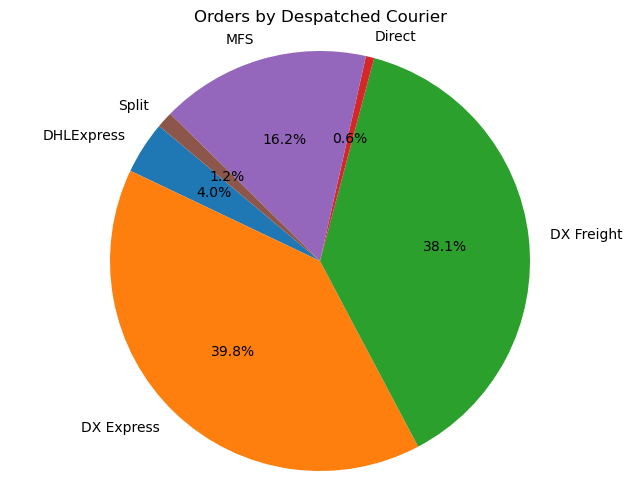

In [18]:
# Plot a pie chart to display orders by Despatched Courier.
plt.figure(figsize=(8, 6))
plt.pie(orders_v1['count'], labels=orders_v1['DespatchedCourier'], autopct='%1.1f%%', startangle=140)
plt.title('Orders by Despatched Courier')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot.
plt.show()

> **It seems reasonable that we could find some negative reviews about deliveries from DX since they are the couriers with the most deliveries (representing almost 80% of the June deliveries)**.